<a href="https://colab.research.google.com/github/Mamoro98/Statistics/blob/main/Stat_Prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/LBW.csv')

In [3]:
df.head()

,iqfull,iqverb,iqperf,rcomp,rrate,racc,tomifull,bw,rbw,ga,sex,educage,benef
0,90,87,95,87,90,86,4.0,1.12,0.99,27,0,16.0,2.0
1,104,96,114,94,114,105,3.5,1.25,1.11,27,0,16.0,1.0
2,82,85,82,90,87,91,1.5,1.27,1.04,28,0,16.0,2.0
3,91,91,92,90,88,90,5.5,1.25,1.02,28,0,16.0,2.0
4,87,87,88,85,96,95,8.5,0.97,0.79,28,0,16.0,1.0


In [4]:
df.columns

Index(['iqfull', 'iqverb', 'iqperf', 'rcomp', 'rrate', 'racc', 'tomifull',
       'bw', 'rbw', 'ga', 'sex', 'educage', 'benef'],
      dtype='object')

In [6]:
df['educage']

,educage
0,16.0
1,16.0
2,16.0
3,16.0
4,16.0
...,...
153,25.0
154,18.0
155,18.0
156,NaN


Professors Pharoah and Cooke, University of Liverpool, collected data on all infants ges-
tational age ≤ 32 weeks born to mothers resident in Cheshire and Merseyside 1980- 1981.

At age 8-9 years, IQ and reading skills were assessed, and some socio-economic data col-
lected. The questions of interest are whether premature birth, or growth restriction affect

these skills.

Explore some contingency tables and scatter plots.
For example, how does birth weight vary with gestational age? Is it the same for boys
and girls? Add fitted lines to your graph.
How does reading comprehension compare with reading accuracy? Is it the same for boys
and girls? Add fitted lines to your graph.

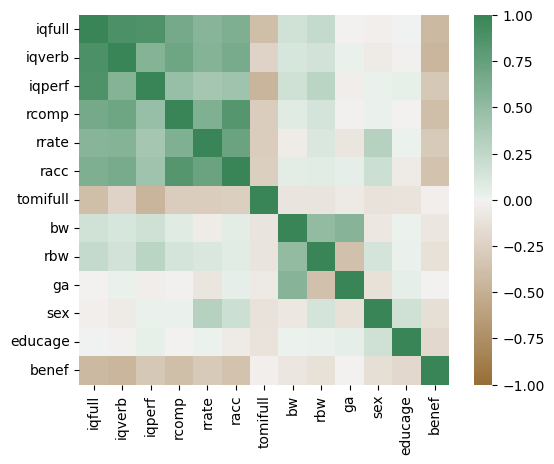

In [5]:
import seaborn as sns

df_corr = df.corr()

axis_corr = sns.heatmap(
df_corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [37]:
data_crosstab = pd.crosstab(df['sex'],
                            [df['bw'],df['ga']],
                               margins = True)
print(data_crosstab)

bw  0.63 0.69 0.7 0.73 0.8    0.85    0.86 0.87  ... 1.75 1.78    1.79 1.88  \
ga    27   27  29   31  25 29   27 30   28   25  ...   32   31 32   32   31   
sex                                              ...                          
0      0    0   1    1   1  1    0  0    0    0  ...    0    0  1    1    1   
1      1    1   0    0   0  0    1  1    2    1  ...    1    1  0    0    0   
All    1    1   1    1   1  1    1  1    2    1  ...    1    1  1    1    1   

bw  1.9 1.93    2.0  All  
ga   32   28 32  32       
sex                       
0     1    0  1   2   87  
1     1    1  0   0   71  
All   2    1  1   2  158  

[3 rows x 129 columns]


In [38]:
data_crosstab = pd.crosstab(df['sex'],
                            [df['rcomp'],df['racc']],
                               margins = True)
print(data_crosstab)

rcomp 71    78             80        ... 136 140 142         144 146     151  \
racc  71 83 78 82 83 86 87 74 81 82  ... 138 126 143 146 147 137 131 143 152   
sex                                  ...                                       
0      6  0  1  1  1  0  1  1  1  1  ...   0   1   0   1   1   0   1   1   0   
1      1  1  0  0  0  1  0  0  0  0  ...   1   0   1   0   0   1   0   0   1   
All    7  1  1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1   1   1   

rcomp  All  
racc        
sex         
0       87  
1       71  
All    158  

[3 rows x 136 columns]


For example, how does birth weight vary with gestational age? Is it the same for boys
and girls? Add fitted lines to your graph.

In [8]:
bw = df['bw']
gage = df['ga']

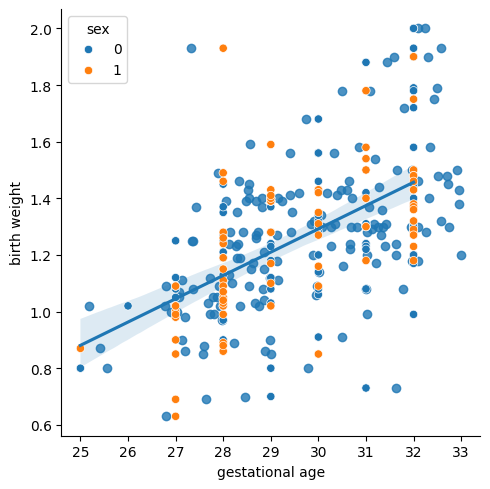

In [33]:
sns.lmplot(x="ga", y="bw", data=df, x_jitter=1)
sns.scatterplot(x=gage, y=bw, hue=df['sex'])
plt.xlabel('gestational age')
plt.ylabel('birth weight')
plt.show()

In [19]:
df.columns

Index(['iqfull', 'iqverb', 'iqperf', 'rcomp', 'rrate', 'racc', 'tomifull',
       'bw', 'rbw', 'ga', 'sex', 'educage', 'benef'],
      dtype='object')

How does reading comprehension compare with reading accuracy? Is it the same for boys
and girls? Add fitted lines to your graph.

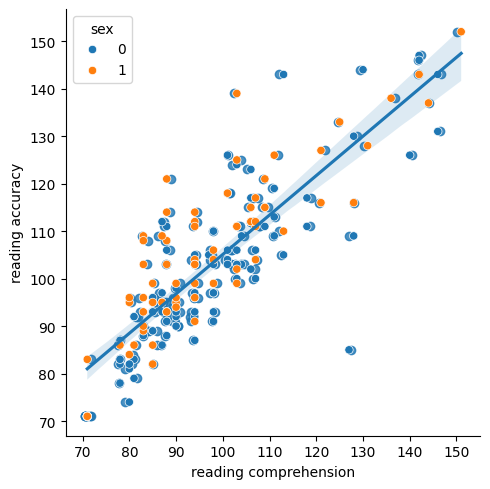

In [32]:
sns.lmplot(x="rcomp", y="racc", data=df, x_jitter=1)
sns.scatterplot(x=df['rcomp'], y=df['racc'], hue=df['sex'])
plt.xlabel('reading comprehension')
plt.ylabel('reading accuracy')
plt.show()